In [160]:
# Vincent Hong
# DA320
# Professor Spence
# October 26, 2022
# Assignment: Detecting Outliers
# Sources: Statistica.com, Wikipedia.com, and example code provided by Professor Spence

# Importing all the necessary modules
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import pyplot
import numpy as  np

# Loading the json file that containins my secret MongoDB connection string
with open ('/Users/hong.vince/Desktop/DA320/credentials.json') as u:
    data = json.load(u)

    secret_key = data['my-secret-key']

In [183]:
# Connecting to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetching my database titled "DA320"
da320_database = client['DA320']

# Accessing my collections from my "DA320" database
allCollections = da320_database.list_collection_names()

# Print statements that display the current version as well as the collections present in DA320
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.13.
This database has the collections ['Metacritic', 'IMDB']


In [177]:
# Retrieving all records from the "IMDB" collection
cursor = da320_database["IMDB"].find()

# Converting the information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Displaying the first few records 
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634f11259f97cc19992a4ba0,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,634f11259f97cc19992a4ba1,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,634f11259f97cc19992a4ba2,77416,The Deer Hunter,183,8.1,334827,R,12/8/1978,15000000,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,634f11259f97cc19992a4ba3,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,634f11259f97cc19992a4ba4,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [200]:
# Transforming the Release Date column to a datetime data type
imdb['release_date'] = pd.to_datetime(imdb['release_date'], errors='coerce')

# Transforming the Budget column to a numeric data type
imdb['budget'] = pd.to_numeric(imdb['budget'], errors='coerce')

# Transforming the Budget column to a numeric data type
imdb['runtime'] = pd.to_numeric(imdb['runtime'], errors='coerce')

imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634f11259f97cc19992a4ba0,77631,Grease,110.0,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,634f11259f97cc19992a4ba1,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,634f11259f97cc19992a4ba2,77416,The Deer Hunter,183.0,8.1,334827,R,1978-12-08,15000000.0,None,None,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,634f11259f97cc19992a4ba3,77651,Halloween,91.0,7.7,267109,TV-14,1978-10-25,300000.0,None,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,634f11259f97cc19992a4ba4,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",1978-07-27,3000000.0,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [201]:
# Custom formatter for currency, provided by Professor Spence
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

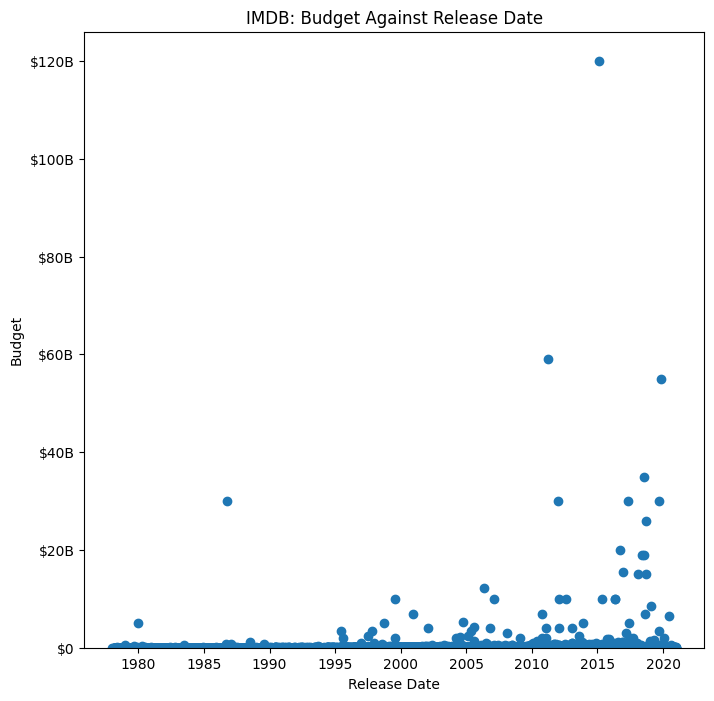

In [202]:
# Plotting Release Date Against Budget in a Scatter Plot
pyplot.title('IMDB: Budget Against Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(release_date, budget)
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.ylim(0,)

pyplot.show()

In [203]:
# Detecting the Top Outliers for Budget
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
21559,634f112f9f97cc19992a9fd7,3921314,Muhammad: The Messenger of God,162.0,7.2,10764,None,2015-02-01,1.200000e+11,None,None,"Biography, Drama, History","Mahdi Pakdel, Sareh Bayat, Mina Sadati, Ali Re...",Majid Majidi,"Muhammad Mehdi Heidarian, Majid Majidi, Farzad...",Nourtaban Film Industry
17382,634f112d9f97cc19992a8f86,3131744,Deportees 3,112.0,2.4,1631,NaN,2011-03-17,5.900000e+10,None,None,"Action, Comedy, Drama","Akbar Abdi, Armin Alavi, Kamand Amirsoleimani,...",Masoud Dehnamaki,"Saeed Bagheri, Masoud Dehnamaki, Mohamad Reza ...",", , , ,"
28238,634f11329f97cc19992ab9ee,11296132,The Singer,107.0,4.5,1594,NaN,2019-11-06,5.500000e+10,None,None,"Comedy, Drama, Music, Romance","Ziba Hajian, Parviz Parastui, Elnaz Shakerdoos...",Mostafa Kiayee,"Shahin Fardtombekiyan, Mostafa Kiayee","Filmiran, HA International, Karen Film"
25980,634f11319f97cc19992ab11c,8116428,Along With the Gods: The Last 49 Days,142.0,7.1,7171,Not Rated,2018-08-01,3.500000e+10,None,None,"Action, Drama, Fantasy","Ha Jung-woo, Ju Ji-Hoon, Hyang-gi Kim, Ma Dong...",Yong-hwa Kim,"Ji-sun Choi, Won Dong-Yeon, Yong-hwa Kim, Daes...","Dexter Studios, Realies Pictures"
16604,634f112d9f97cc19992a8c7c,1606384,My Way,137.0,7.6,11687,R,2011-12-22,3.000000e+10,None,None,"Action, Drama, War","Jang Dong-Gun, Joe Odagiri, Bingbing Fan, Kim ...",Je-kyu Kang,"Jong Chul Gil, Je-kyu Kang, Myung Chan Kang, Y...","Directors, SK Planet, CJ Entertainment"


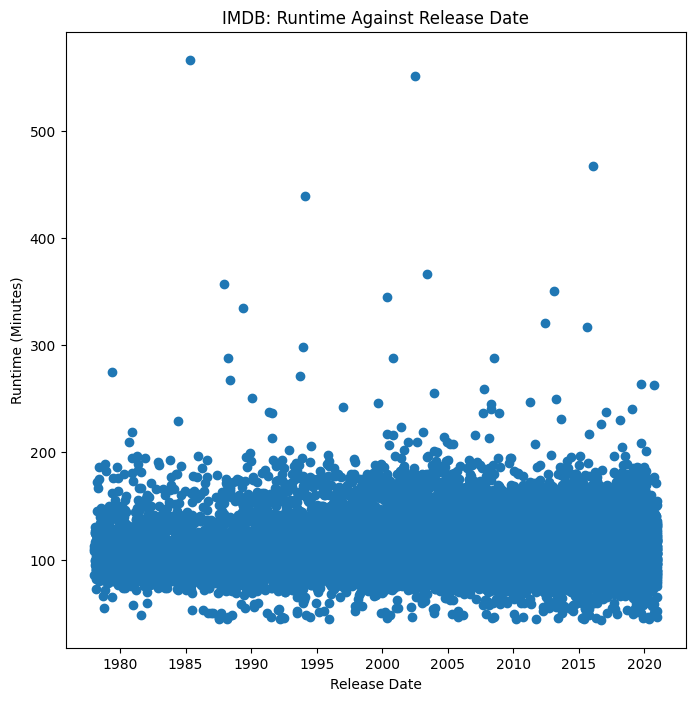

In [162]:
# Plotting Release Date Against Runtime in a Scatter Plot
pyplot.title('IMDB: Runtime Against Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime (Minutes)')
pyplot.scatter(release_date, runtime)

pyplot.show()

In [199]:
# Detecting the Top Outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
1830,634f11269f97cc19992a52c6,90015,Shoah,566.0,8.7,9396,Not Rated,1985-04-30,NaN,None,None,"Documentary, History, War","Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann,", , , ,","British Broadcasting Corporation, Historia, Le..."
8851,634f11299f97cc19992a6e33,389448,Tie Xi Qu: West of the Tracks,551.0,8.2,1163,None,2002-06-21,NaN,None,None,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ..."
22743,634f11309f97cc19992aa477,5275892,O.J.: Made in America,467.0,8.9,19642,TV-MA,2016-01-22,NaN,None,None,"Documentary, Biography, Crime, History","Kareem Abdul-Jabbar, Mike Albanese, Muhammad A...",Ezra Edelman,"John Dahl, Ryan Dilts, Ezra Edelman, Cristina ...","ESPN Films, Laylow Films"
4814,634f11279f97cc19992a5e6e,111341,Satantango,439.0,8.3,10916,Not Rated,1994-02-08,NaN,None,None,Drama,"Mihály Vig, Putyi Horváth, László feLugossy, É...",Béla Tarr,"György Fehér, Joachim von Vietinghoff, Ruth Wa...","Mozgókép Innovációs Társulás és Alapítvány, Vo..."
9271,634f11299f97cc19992a6fd7,346336,The Best of Youth,366.0,8.5,21923,R::(part 1),2003-05-20,NaN,None,2799773,"Drama, Romance","Luigi Lo Cascio, Alessio Boni, Adriana Asti, S...",Marco Tullio Giordana,"Angelo Barbagallo, Gianfranco Barbagallo, Dona...","BiBi Film, Rai Fiction, Film Commission Torino..."


================================================== Suggestions and Conclusion ==================================================

Budget
- It appears that the budget for each movie in this dataset does not account for foreign currencies such as IRR, Yen, and so on. Therefore, seemingly impossible outliers appear in the Scatterplot and dataset due to the lack of currency distinction. A possible solution to this would be to implement a currency filter that fetches the the currency, and creates two seperate columns (Country of Origin Currency column, followed by the USD equivalent). For instance, columns titled Budget(IRR), Budget(USD) would help distinguish movie budgets with non-USD values. This would enable accurate budget comparisons to be made. 

Runtime
- It appears that the runtime has a number of outliers with a significant value. According to Wikipedia, most feature films are between 75 and 210 minutes long. Additionally, according to Statista.com, in 2021, the average length of the top 10 highest-grossing feature-length films in the U.S. and Canada clocked in at 130.9 minutes (2 hours and 10 minutes). All this to say, a potential solution to filtering out these outliers is to provide an additional column titled Runtime_Length that categorizes the runtime into four groups. For instance; 
    
    If Runtime > 210, then Runtime_Length = Very Long
    If 210 < Runtime > 131 minutes, then Runtime_Length = Long
    If 131 < Runtime > 75 minutes, then Runtime_Length = Average
    If Runtime < 75 minutes, then Runtime_Length = Short

This will atleast provide users with more control over this large dataset. 

Conclusion
- The IMDB data used in this week's assignment is a good example of what not to do when preparing data. It illustrates a poorly structured, mis-formatted dataset that paints an inaccurate picture. The biggest red flag is the budget column, where the currencies are not distinguished from one another.